In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm
import time

In [18]:
d = pd.read_csv('spam.csv',encoding='latin-1')
d

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [22]:
df=d.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [23]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [25]:
df.isna().any()

v1    False
v2    False
dtype: bool

In [26]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [27]:
df['v2'].nunique()

5169

In [29]:
df.shape

(5572, 2)

In [30]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


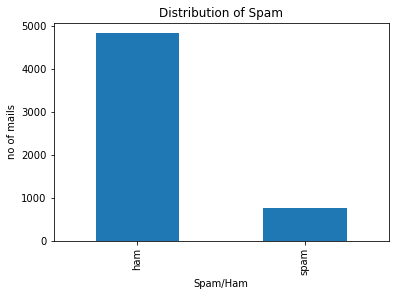

In [32]:
class_c = df['v1'].value_counts()
class_c.plot(kind='bar')
plt.title('Distribution of Spam')
plt.xlabel('Spam/Ham')
plt.ylabel('no of mails')
plt.show()

In [36]:
from collections import Counter
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [38]:
all_text = ' '.join(df['v2'].values)
all_text= re.sub(r'https\S+','',all_text)
all_text= re.sub(r'@\S+','',all_text)
all_text= re.sub(r'#\S+','',all_text)

In [39]:
words = all_text.split()

In [40]:
stop_words=set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [43]:
word_counts = Counter(words)
top_words=word_counts.most_common(100)
top_words


[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

In [44]:
top_words=word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

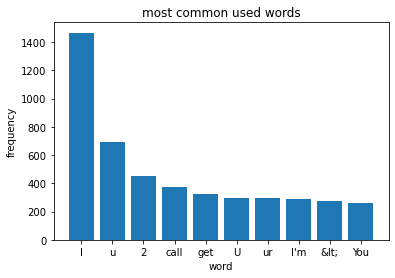

In [45]:
plt.bar(x_values,y_values)
plt.title('most common used words')
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

In [53]:
def clean_text(text):
    text = re.sub('<.*?','',text)
    text = re.sub('[^a-zA-Z]','',text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w  in words]
    text = ' '.join(words)
    return text

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
%%time
tqdm.pandas()
df['cleaned_text']=df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

Wall time: 2.69 s


In [56]:
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()

In [153]:
clf.fit(x_train,y_train)

LogisticRegression()

In [154]:
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy:",acc)

Accuracy: 86.99551569506725


<AxesSubplot:>

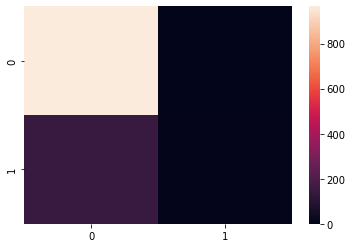

In [155]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)
sns.heatmap(c)

In [156]:
c

array([[965,   0],
       [145,   5]], dtype=int64)

In [157]:

from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       1.00      0.03      0.06       150

    accuracy                           0.87      1115
   macro avg       0.93      0.52      0.50      1115
weighted avg       0.89      0.87      0.81      1115

